IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# Mini-projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Yuxiang ZHANG & Antoine LECOMTE

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et <u>**un seul rendu sur un des deux comptes Moodle doit être fait**</u>.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**La dernière séance de TD-TME11 de votre groupe sera réservée pour travailler sur ce mini-projet.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *projet-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2025


<font size="+1" color="RED"><b>Date de rendu : au plus tard le lundi 19 mai 2025, avant 11h</b></font>
    
<b>Attention! le site Moodle ferme à 11h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...
<b>Il n'y aura pas de prolongation possible.</b>

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.



## Travail à faire

Appliquer les algorithmes d'apprentissage vus en cours sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Compte-rendu demandé
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce **notebook** complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre **librairie iads** sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un **poster** sous la forme d'un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les <u>fichiers de données ne doivent pas être inclus dans votre archive</u> ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- **Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 20 mai 2025**</font>, à partir de 9h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille (la remise d'un compte-rendu avant lundi 19 mai 11h est obligatoire pour être autorisé à passer une soutenance).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- MiniProjet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données doit considérer cette arborescence.



In [2]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : 20newsgroups

Les données sont fournies dans le fichier CSV `20newsgroups.csv` contenu dans l'archive. Une documentation sur ces données peut être consultée sur la <a href="http://qwone.com/~jason/20Newsgroups/" target="NEW">page ScikitLearn</a>.
Ces données sont des dépêches issues de 20 groupes de discussions.


### Chargement des données

In [3]:
newsgroups_df = pd.read_csv("data/20newsgroups.csv")
newsgroups_df

,messages,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


### Prétraitement

Dans un premier temps, vous devez appliquer les étapes de prétraitements vues dans le TME 6. Pour le nettoyage, la liste des mots inutiles (stopwords) est fournie dans le fichier `stopwords.csv` de l'archive

In [4]:
stop_words_df = pd.read_csv("data/stopwords.csv")
stop_words_df

,stopword
0,a
1,about
2,above
3,after
4,again
...,...
193,you're
194,yours
195,yourself
196,yourselves


In [5]:
newsgroups_df_neitoie = newsgroups_df.dropna(subset=['messages'])
stop_words_list = stop_words_df['stopword'].tolist()
newsgroups_df_neitoie['les_mots'] = newsgroups_df_neitoie['messages'].apply(lambda x: ut.text2vect(x, stop_words_list))
newsgroups_df_neitoie

/var/folders/x0/9jmwqqtj7s13pdfprxbhp6r00000gn/T/ipykernel_37597/959504396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsgroups_df_neitoie['les_mots'] = newsgroups_df_neitoie['messages'].apply(lambda x: ut.text2vect(x, stop_words_list))


,messages,target,les_mots
0,\n\nI am sure some bashers of Pens fans are pr...,10,"[sure, bashers, pens, fans, pretty, confused, ..."
1,My brother is in the market for a high-perform...,3,"[brother, market, high, performance, video, ca..."
2,\n\n\n\n\tFinally you said what you dream abou...,17,"[finally, said, dream, mediterranean, new, are..."
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,"[think, scsi, card, dma, transfers, disks, scs..."
4,1) I have an old Jasmine drive which I cann...,4,"[old, jasmine, drive, cannot, use, new, system..."
...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,"[dn, nyeda, cnsvax, uwec, edu, david, nye, dn,..."
18842,\nNot in isolated ground recepticles (usually ...,12,"[isolated, ground, recepticles, usually, unusu..."
18843,I just installed a DX2-66 CPU in a clone mothe...,3,"[installed, cpu, clone, motherboard, tried, mo..."
18844,\nWouldn't this require a hyper-sphere. In 3-...,1,"[require, hyper, sphere, space, points, specif..."


In [6]:
index_mots = sorted(set(word for mots in newsgroups_df_neitoie['les_mots'] for word in mots))

print("Nombre de mots trouvés: ", len(index_mots))
print("Les 10 premiers :", index_mots[0:10]) 

# pour contrôler:
for i in range(30,len(index_mots),100):
    print("\ten position ",i," --> ", index_mots[i])


Nombre de mots trouvés:  90850
Les 10 premiers : ["''a", "''achzq", "''afduqy", "''afg", "''ai", "''ai''q", "''al", "''bpl", "''bs", "''c"]
	en position  30  -->  'afdzqvg'al
	en position  130  -->  'i'
	en position  230  -->  'qp
	en position  330  -->  'wx
	en position  430  -->  aarskog
	en position  530  -->  abhorrence
	en position  630  -->  abridgement
	en position  730  -->  acadamy
	en position  830  -->  accom
	en position  930  -->  accusers
	en position  1030  -->  acknowledgment
	en position  1130  -->  activitiests
	en position  1230  -->  adda
	en position  1330  -->  aditives
	en position  1430  -->  ado
	en position  1530  -->  adventists
	en position  1630  -->  aerodynamics
	en position  1730  -->  afflicting
	en position  1830  -->  agabus
	en position  1930  -->  agonies
	en position  2030  -->  ahmad
	en position  2130  -->  aire
	en position  2230  -->  ajteel
	en position  2330  -->  alarm
	en position  2430  -->  aleuts
	en position  2530  -->  alive
	en positi

In [7]:
from collections import Counter
import nltk
from nltk.corpus import words
nltk.download('words')

english_vocab = set(words.words())

all_words = [word for mots in newsgroups_df_neitoie['les_mots'] for word in mots]
word_counts = Counter(all_words)

index_mots = sorted(set(
    mot for mot in all_words
    if mot[0].isalpha()
    and mot.isalpha()
    and 3 <= len(mot) <= 20
    and word_counts[mot] >= 5
    and mot.lower() in english_vocab
))

print("Nombre de mots trouvés: ", len(index_mots))
print("Les 10 premiers :", index_mots[0:10]) 

# pour contrôler:
for i in range(30,len(index_mots),100):
    print("\ten position ",i," --> ", index_mots[i])


[nltk_data] Downloading package words to
[nltk_data]     /Users/yuxiangzhang/nltk_data...
[nltk_data]   Package words is already up-to-date!


Nombre de mots trouvés:  11928
Les 10 premiers : ['abandon', 'abandoned', 'abbey', 'abbreviation', 'abdomen', 'abdominal', 'abduct', 'aberrant', 'aberration', 'abhor']
	en position  30  -->  absolute
	en position  130  -->  acupuncture
	en position  230  -->  aftermath
	en position  330  -->  alpine
	en position  430  -->  angular
	en position  530  -->  applicant
	en position  630  -->  ashamed
	en position  730  -->  attractive
	en position  830  -->  bacterium
	en position  930  -->  batting
	en position  1030  -->  betting
	en position  1130  -->  blink
	en position  1230  -->  bound
	en position  1330  -->  brutal
	en position  1430  -->  cain
	en position  1530  -->  carry
	en position  1630  -->  chalk
	en position  1730  -->  choleric
	en position  1830  -->  click
	en position  1930  -->  collapse
	en position  2030  -->  compatible
	en position  2130  -->  condensed
	en position  2230  -->  conspiracy
	en position  2330  -->  convinced
	en position  2430  -->  coupon
	en posi

### Apprentissage supervisé

*Tâches*: évaluation d'algorithmes et de représentations des données.
- classification binaire
- classification multi-classe

*Etudes suggérées*:
- représentations des données
    - avec ou sans suppression des stopwords
    - différentes représentations: bag-of-words binaire, avec comptage, avec fréquences, avec tfidf
- différents classifiers:
    - perceptron,
    - k-plus proches voisins avec distance euclidienne,
    - k-plus proches voisins avec distance cosinus (cf. TD),
    - Naives Bayes,
    - arbres de décision
- analyse des résultats:
    - accuracy, temps d'exécutions
    - score fold par fold
    - matrice de confusion


## Tâches à réaliser

In [8]:
from scipy.sparse import csr_matrix

def bag_of_words_sparse_manual(texts_tokenized, vocab, mode="count"):
    """
    :param mode: valeurs possibles : 'count', 'binary', 'freq'
    """
    from scipy.sparse import csr_matrix
    vocab_index = {word: i for i, word in enumerate(vocab)}

    rows, cols, data = [], [], []

    for row_idx, tokens in enumerate(texts_tokenized):
        word_counts = {}
        for word in tokens:
            if word in vocab_index:
                col_idx = vocab_index[word]
                word_counts[col_idx] = word_counts.get(col_idx, 0) + 1

        total_words = sum(word_counts.values())

        for col_idx, count in word_counts.items():
            rows.append(row_idx)
            cols.append(col_idx)

            if mode == "count":
                value = count
            elif mode == "binary":
                value = 1
            elif mode == "freq":
                value = count / total_words
            else:
                raise ValueError("Mode non supporté : choisissez parmi 'count', 'binary', 'freq'")

            data.append(value)

    n_rows = len(texts_tokenized)
    n_cols = len(vocab)
    
    sparse_matrix = csr_matrix((data, (rows, cols)), shape=(n_rows, n_cols), dtype=float)
    return sparse_matrix, vocab_index

In [9]:
import math
def bag_of_words_tfidf_manual(textes_tokenisés, vocabulaire):
    """
    :param textes_tokenisés: Liste de listes de mots (tokens)
    :param vocabulaire: liste des mots du vocabulaire
    :return: matrice creuse TF-IDF (csr_matrix), dictionnaire {mot: index}
    """
    vocab_index = {mot: i for i, mot in enumerate(vocabulaire)}
    N_docs = len(textes_tokenisés)  # Nombre de documents
    
    # 1. Calcul de la DF (Document Frequency)
    df_counts = np.zeros(len(vocabulaire))
    for tokens in textes_tokenisés:
        mots_uniques = set(tokens)
        for mot in mots_uniques:
            if mot in vocab_index:
                df_counts[vocab_index[mot]] += 1
    
    # Éviter la division par 0
    df_counts[df_counts == 0] = 1

    # 2. Construction de la matrice creuse TF-IDF
    lignes, colonnes, données = [], [], []

    for doc_idx, tokens in enumerate(textes_tokenisés):
        tf_counts = {}
        for mot in tokens:
            if mot in vocab_index:
                idx = vocab_index[mot]
                tf_counts[idx] = tf_counts.get(idx, 0) + 1

        total_mots = sum(tf_counts.values())

        for idx, tf in tf_counts.items():
            tf_val = tf / total_mots
            idf_val = math.log(N_docs / df_counts[idx])
            tfidf = tf_val * idf_val

            lignes.append(doc_idx)
            colonnes.append(idx)
            données.append(tfidf)

    mat = csr_matrix((données, (lignes, colonnes)), shape=(N_docs, len(vocabulaire)))
    return mat, vocab_index


In [10]:
# Appel de la fonction pour générer la matrice BoW
X_sparse, vec = bag_of_words_sparse_manual(newsgroups_df_neitoie['les_mots'], index_mots)

# Vérification de la forme de la matrice
print(X_sparse.shape)
print(type(X_sparse))

# Conversion en DataFrame pour affichage
df_bow = pd.DataFrame(X_sparse.toarray(), columns=index_mots)
df_bow

(18466, 11928)
<class 'scipy.sparse._csr.csr_matrix'>


,abandon,abandoned,abbey,abbreviation,abdomen,abdominal,abduct,aberrant,aberration,abhor,...,zeta,zinc,zip,zipper,zippy,zodiacal,zone,zoo,zooid,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
np.random.seed(42)  # Pour reproductibilité

# Pourcentage d'exemples de chaque classe à garder :
taux = 0.1  # 10%

# Déclaration des variables qui seront initialisées dans la boucle :
df_train = pd.DataFrame()  
df_test = pd.DataFrame()

les_targets = newsgroups_df_neitoie['target'].unique()

for l in les_targets:
    nb_total = newsgroups_df_neitoie['target'].value_counts()[l]  # Nombre total d'exemples pour la classe l
    nb_pris = int(nb_total * taux)  # Nombre d'exemples à prendre pour l'entraînement
    print(f"Nombre d'exemples du label {l} pris pour apprendre: {nb_pris}")

    # Récupération des indices des exemples de cette classe
    les_ids = newsgroups_df_neitoie[newsgroups_df_neitoie['target'] == l].index.to_list()
    
    # Mélanger les indices aléatoirement
    np.random.shuffle(les_ids)

    # Séparer les indices pour l'entraînement et le test
    ids_train = les_ids[:nb_pris]  # 10% pour l'entraînement
    ids_test = les_ids[nb_pris:]   # Le reste pour le test

    # Ajouter les données correspondantes aux DataFrames
    df_train = pd.concat([df_train, newsgroups_df_neitoie.loc[ids_train]], ignore_index=True)
    df_test = pd.concat([df_test, newsgroups_df_neitoie.loc[ids_test]], ignore_index=True)

# Résultat :
print(f"Dimension de df_train:\t{df_train.shape}")
print(f"Dimension de df_test:\t{df_test.shape}")

Nombre d'exemples du label 10 pris pour apprendre: 98
Nombre d'exemples du label 3 pris pour apprendre: 97
Nombre d'exemples du label 17 pris pour apprendre: 92
Nombre d'exemples du label 4 pris pour apprendre: 93
Nombre d'exemples du label 12 pris pour apprendre: 96
Nombre d'exemples du label 19 pris pour apprendre: 60
Nombre d'exemples du label 11 pris pour apprendre: 96
Nombre d'exemples du label 13 pris pour apprendre: 96
Nombre d'exemples du label 0 pris pour apprendre: 78
Nombre d'exemples du label 8 pris pour apprendre: 97
Nombre d'exemples du label 7 pris pour apprendre: 94
Nombre d'exemples du label 5 pris pour apprendre: 98
Nombre d'exemples du label 1 pris pour apprendre: 95
Nombre d'exemples du label 14 pris pour apprendre: 96
Nombre d'exemples du label 16 pris pour apprendre: 89
Nombre d'exemples du label 6 pris pour apprendre: 96
Nombre d'exemples du label 9 pris pour apprendre: 96
Nombre d'exemples du label 18 pris pour apprendre: 76
Nombre d'exemples du label 2 pris pou

# Classifier Perceptron

Temps total d'entraînement : 1.237083911895752 secondes


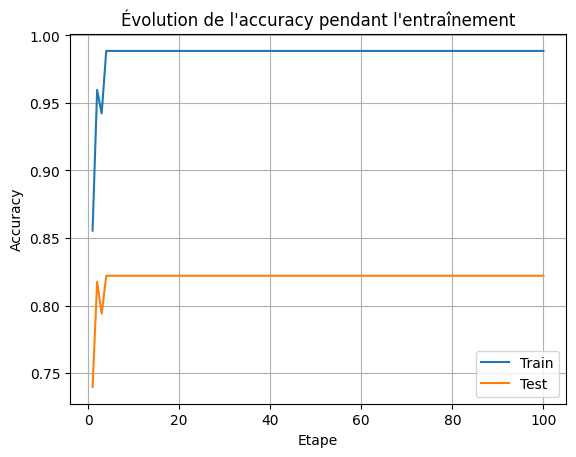

------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0)]
Taux moyen de bonne classification : 0.9882
Écart-type : 0.0144


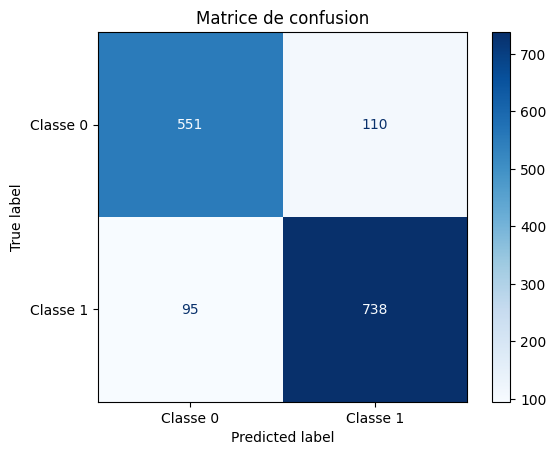

In [12]:
# ======================================================
# Classification binaire avec Perceptron - Version 1
# ======================================================
# Cette version utilise une méthode de conversion directe des données
# via la fonction df2array (non détaillée ici)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sélection des deux classes à classifier
classe1 = 0
classe2 = 1

# Filtrage des données d'entraînement et de test
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en format binaire (-1/+1)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Préparation des données d'entraînement et de test
X_train_bin = ut.df2array(df_binaire, index_mots)  # Conversion des features
y_train_bin = df_binaire['target_bin'].values      # Labels d'entraînement

X_test_bin = ut.df2array(df_test_bin, index_mots)  # Conversion des features
y_test_bin = df_test_bin['target_bin'].values      # Labels de test

# Initialisation du perceptron
perceptron = classif.ClassifierPerceptron(input_dimension=X_train_bin.shape[1], learning_rate=0.01)

# Listes pour stocker les performances
train_acc = []  # Précision sur le train set
test_acc = []   # Précision sur le test set

# Boucle d'entraînement
N = 100  # Nombre d'itérations

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Étape d'entraînement
    perceptron.train_step(X_train_bin, y_train_bin)
    
    # Prédictions et calcul de l'accuracy
    y_train_pred = np.array([perceptron.predict(x) for x in X_train_bin])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test_bin])
    
    # Enregistrement des performances
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())
    
end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1,N+1),train_acc, label='Train')
plt.plot(range(1,N+1),test_acc, label='Test')  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.title("Évolution de l'accuracy pendant l'entraînement")
plt.legend()
plt.grid(True)
plt.show()

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.6181430816650391 secondes


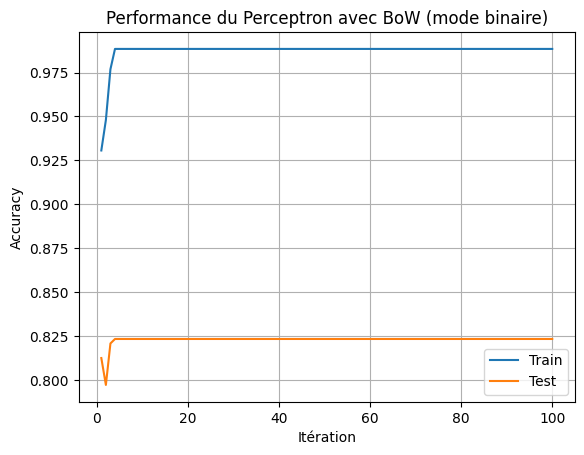

Accuracy finale (train): 0.9884393063583815
Accuracy finale (test) : 0.8233418367346939
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0)]
Taux moyen de bonne classification : 0.9882
Écart-type : 0.0144


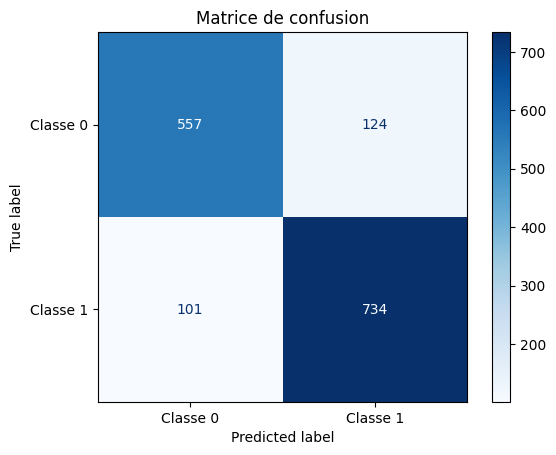

In [13]:
# ======================================================
# Classification binaire avec Bag-of-Words (Binaire) avec Perceptron - Version 2
# ======================================================
# Cette version utilise explicitement un modèle Bag-of-Words (BoW)
# pour la vectorisation des textes

# Sélection des classes (identique à la version 1)
classe1 = 0
classe2 = 1

# Filtrage des données (identique à la version 1)
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels (identique à la version 1)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Initialisation du perceptron
perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

# Entraînement et évaluation
N = 100  # Nombre d'itérations
train_acc, test_acc = [], []  # Stockage des performances

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Étape d'entraînement
    perceptron.train_step(X_train, y_train_bin)
    
    # Prédictions
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    # Calcul et enregistrement des performances
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Performance du Perceptron avec BoW (mode binaire)")
plt.legend()
plt.grid(True)
plt.show()

# Affichage des résultats finaux
print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.6257810592651367 secondes


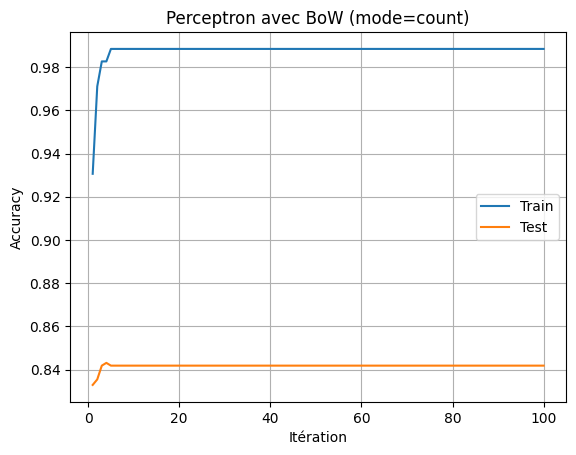

Accuracy finale (train): 0.9884393063583815
Accuracy finale (test) : 0.8418367346938775
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9705882352941176), np.float64(0.9705882352941176), np.float64(0.9705882352941176), np.float64(0.9705882352941176)]
Taux moyen de bonne classification : 0.9765
Écart-type : 0.0118


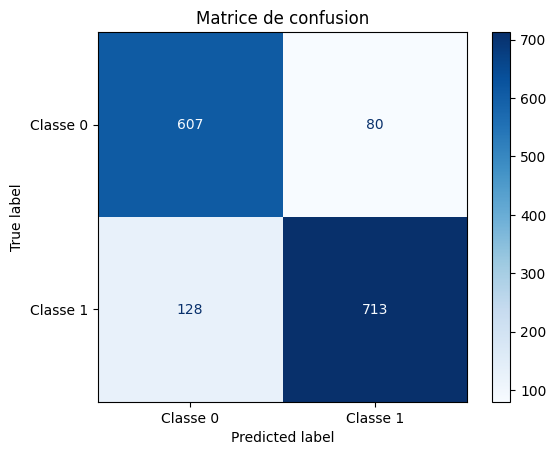

In [14]:
# =================================================================
# Classification binaire avec Comptage de mots (Bag-of-Words count) avec Perceptron - Version 3
# =================================================================
# Cette version utilise la fréquence brute des mots comme caractéristiques

# Définition des classes à classifier
classe1 = 0
classe2 = 1

# Préparation des données - Filtrage des classes sélectionnées
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Transformation des labels en format binaire (-1 pour classe1, +1 pour classe2)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode comptage
# Le mode "count" enregistre le nombre d'occurrences de chaque mot
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Initialisation du perceptron avec le nombre de caractéristiques et taux d'apprentissage
perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

# Boucle d'entraînement et évaluation
N = 100  # Nombre d'itérations
train_acc, test_acc = [], []  # Stockage des précisions

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Phase d'entraînement
    perceptron.train_step(X_train, y_train_bin)
    
    # Prédictions sur les ensembles d'entraînement et de test
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    # Calcul et enregistrement des précisions
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=count)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.6243758201599121 secondes


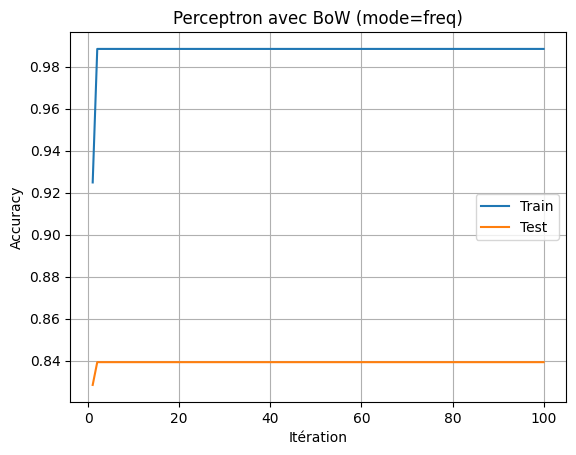

Accuracy finale (train): 0.9884393063583815
Accuracy finale (test) : 0.8392857142857143
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7647
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8235
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.8529411764705882), np.float64(0.8529411764705882), np.float64(0.7647058823529411), np.float64(0.7941176470588235), np.float64(0.8235294117647058)]
Taux moyen de bonne classification : 0.8176
Écart-type : 0.0343


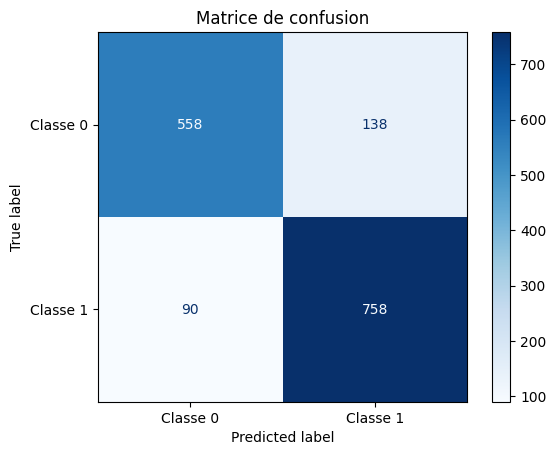

In [15]:
# =================================================================
# Classification binaire avec Fréquence relative (Bag-of-Words freq) avec Perceptron - Version 4
# =================================================================
# Cette version utilise la fréquence relative des mots comme caractéristiques

classe1 = 0
classe2 = 1

df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode fréquence
# Le mode "freq" utilise la fréquence relative (occurrences normalisées par document)
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

N = 100
train_acc, test_acc = [], []

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=freq)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.6422119140625 secondes


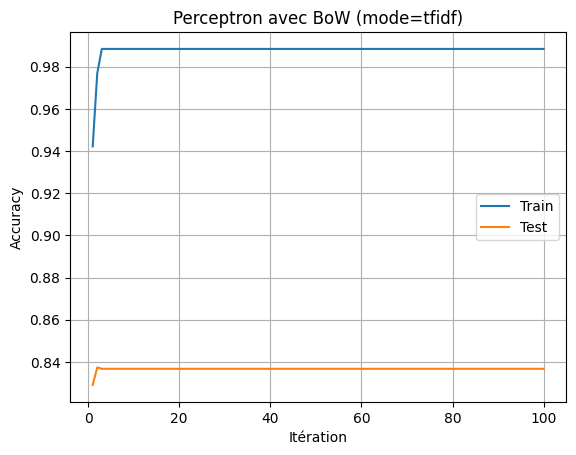

Accuracy finale (train): 0.9884393063583815
Accuracy finale (test) : 0.8367346938775511
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7647
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8235
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9118
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.8823529411764706), np.float64(0.7941176470588235), np.float64(0.7647058823529411), np.float64(0.8235294117647058), np.float64(0.9117647058823529)]
Taux moyen de bonne classification : 0.8353
Écart-type : 0.0546


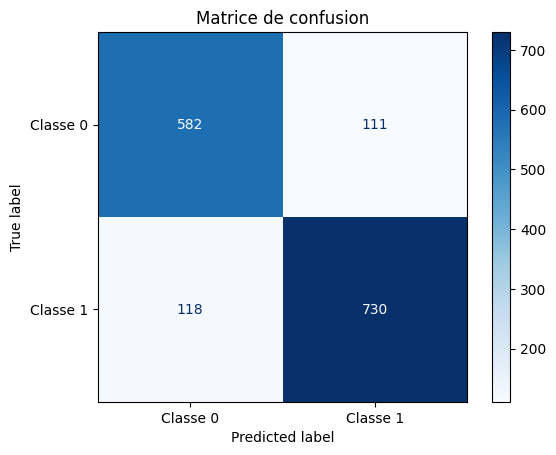

In [16]:
# =================================================================
# Classification binaire avec TF-IDF avec Perceptron - Version 5
# =================================================================
# Cette version utilise le score TF-IDF comme caractéristiques

classe1 = 0
classe2 = 1

df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle TF-IDF
# TF-IDF pondère les mots par leur importance dans le document et le corpus
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

N = 100
train_acc, test_acc = [], []

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=tfidf)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps d'entraînement (multi-classe) : 1.4550647735595703 secondes
Accuracy entraînement : 0.9875
Accuracy test         : 0.4569


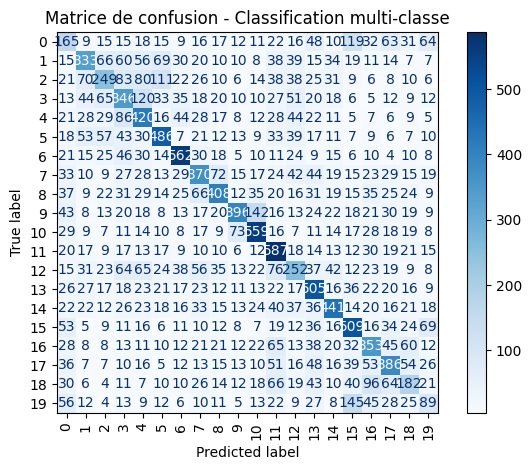

Itération 0: Accuracy = 0.4556
Itération 1: Accuracy = 0.4333
Itération 2: Accuracy = 0.4306
Itération 3: Accuracy = 0.4306
Itération 4: Accuracy = 0.4611
Taux moyen : 0.4422, Écart-type : 0.0133


In [19]:
from sklearn.metrics import accuracy_score

# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "binary"   # "binary", "count", "tf", "tfidf"
learning_rate = 0.01
N = 100                         # Nombre d'itérations pour le perceptron
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe (OAA)
# ---------------------------

# Initialisation du classifieur de base (Perceptron)
perceptron_base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)

# Construction du classifieur multi-classe OAA
oaa_classifier = classif.ClassifierMultiOAA(perceptron_base)

# Chronométrage
start = time.time()
oaa_classifier.train(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = np.array([oaa_classifier.predict(x) for x in X_train])
y_test_pred = np.array([oaa_classifier.predict(x) for x in X_test])

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

# Pour validation croisée, on réinitialise un modèle neuf
def create_new_oaa():
    base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)
    return classif.ClassifierMultiOAA(base)

perf = []
for i in range(nb_folds):
    Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(X_train, y_train_multi, nb_folds, i)
    clf = create_new_oaa()
    clf.train(Xapp, Yapp)
    Y_pred = np.array([clf.predict(x) for x in Xtest])
    acc = np.mean(Y_pred == Ytest)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

Temps d'entraînement (multi-classe) : 1.5670583248138428 secondes
Accuracy entraînement : 0.9869
Accuracy test         : 0.4386


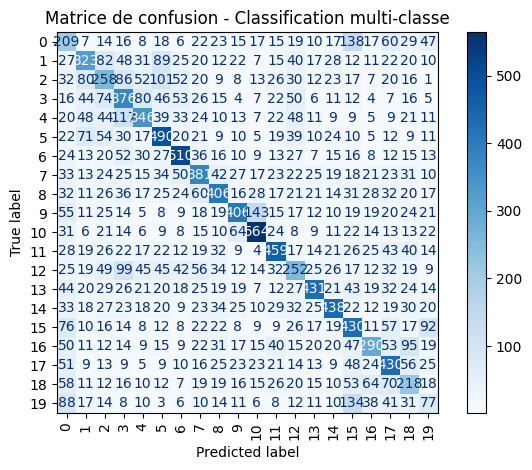

Itération 0: Accuracy = 0.4472
Itération 1: Accuracy = 0.4250
Itération 2: Accuracy = 0.4056
Itération 3: Accuracy = 0.3972
Itération 4: Accuracy = 0.3972
Taux moyen : 0.4144, Écart-type : 0.0193


In [20]:
# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "count"   # "binary", "count", "tf", "tfidf"
learning_rate = 0.01
N = 100                         # Nombre d'itérations pour le perceptron
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe (OAA)
# ---------------------------

# Initialisation du classifieur de base (Perceptron)
perceptron_base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)

# Construction du classifieur multi-classe OAA
oaa_classifier = classif.ClassifierMultiOAA(perceptron_base)

# Chronométrage
start = time.time()
oaa_classifier.train(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = np.array([oaa_classifier.predict(x) for x in X_train])
y_test_pred = np.array([oaa_classifier.predict(x) for x in X_test])

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

# Pour validation croisée, on réinitialise un modèle neuf
def create_new_oaa():
    base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)
    return classif.ClassifierMultiOAA(base)

perf = []
for i in range(nb_folds):
    Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(X_train, y_train_multi, nb_folds, i)
    clf = create_new_oaa()
    clf.train(Xapp, Yapp)
    Y_pred = np.array([clf.predict(x) for x in Xtest])
    acc = np.mean(Y_pred == Ytest)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")


Temps d'entraînement (multi-classe) : 1.5309767723083496 secondes
Accuracy entraînement : 0.9875
Accuracy test         : 0.4203


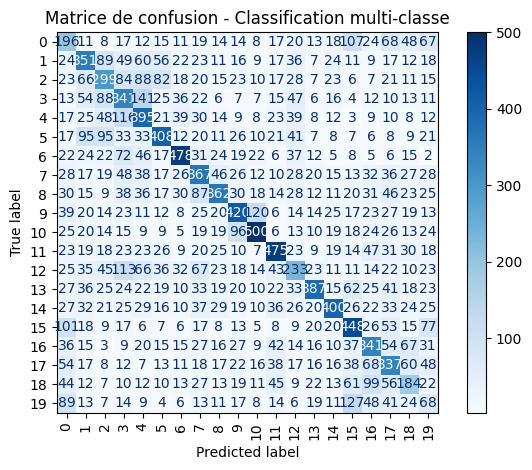

Itération 0: Accuracy = 0.4250
Itération 1: Accuracy = 0.4028
Itération 2: Accuracy = 0.3972
Itération 3: Accuracy = 0.3944
Itération 4: Accuracy = 0.4278
Taux moyen : 0.4094, Écart-type : 0.0141


In [21]:
# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "freq"   # "binary", "count", "tf", "tfidf"
learning_rate = 0.01
N = 100                         # Nombre d'itérations pour le perceptron
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe (OAA)
# ---------------------------

# Initialisation du classifieur de base (Perceptron)
perceptron_base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)

# Construction du classifieur multi-classe OAA
oaa_classifier = classif.ClassifierMultiOAA(perceptron_base)

# Chronométrage
start = time.time()
oaa_classifier.train(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = np.array([oaa_classifier.predict(x) for x in X_train])
y_test_pred = np.array([oaa_classifier.predict(x) for x in X_test])

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

# Pour validation croisée, on réinitialise un modèle neuf
def create_new_oaa():
    base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)
    return classif.ClassifierMultiOAA(base)

perf = []
for i in range(nb_folds):
    Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(X_train, y_train_multi, nb_folds, i)
    clf = create_new_oaa()
    clf.train(Xapp, Yapp)
    Y_pred = np.array([clf.predict(x) for x in Xtest])
    acc = np.mean(Y_pred == Ytest)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")


Temps d'entraînement (multi-classe) : 1.1729028224945068 secondes
Accuracy entraînement : 0.9875
Accuracy test         : 0.4378


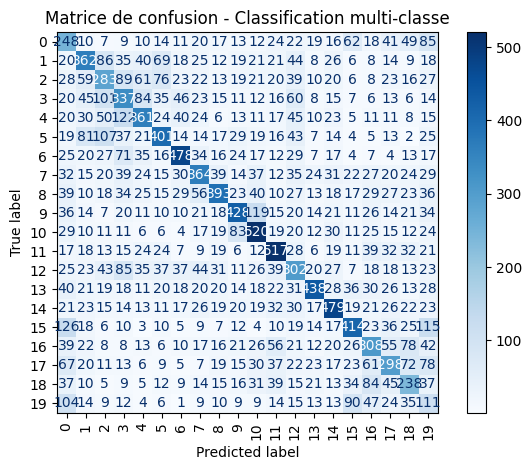

Itération 0: Accuracy = 0.4611
Itération 1: Accuracy = 0.4194
Itération 2: Accuracy = 0.4000
Itération 3: Accuracy = 0.3917
Itération 4: Accuracy = 0.4444
Taux moyen : 0.4233, Écart-type : 0.0262


In [22]:
# ---------------------------
# Paramètres du test
# ---------------------------
learning_rate = 0.01
N = 100                         # Nombre d'itérations pour le perceptron
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe (OAA)
# ---------------------------

# Initialisation du classifieur de base (Perceptron)
perceptron_base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)

# Construction du classifieur multi-classe OAA
oaa_classifier = classif.ClassifierMultiOAA(perceptron_base)

# Chronométrage
start = time.time()
oaa_classifier.train(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = np.array([oaa_classifier.predict(x) for x in X_train])
y_test_pred = np.array([oaa_classifier.predict(x) for x in X_test])

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

# Pour validation croisée, on réinitialise un modèle neuf
def create_new_oaa():
    base = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=learning_rate)
    return classif.ClassifierMultiOAA(base)

perf = []
for i in range(nb_folds):
    Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(X_train, y_train_multi, nb_folds, i)
    clf = create_new_oaa()
    clf.train(Xapp, Yapp)
    Y_pred = np.array([clf.predict(x) for x in Xtest])
    acc = np.mean(Y_pred == Ytest)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")


# Classifier PerceptronBiais

Temps total d'entraînement : 1.4031639099121094 secondes


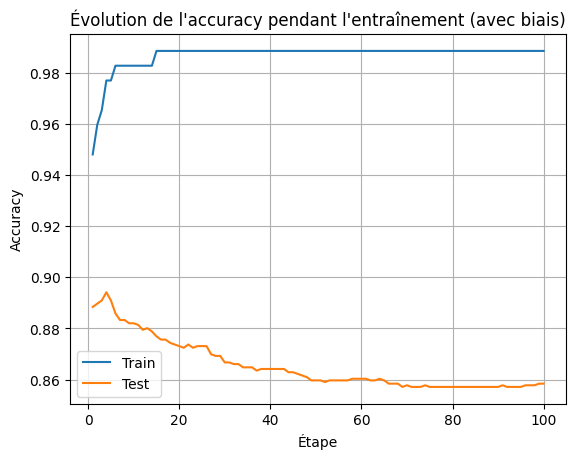

Accuracy finale (train): 0.9884393063583815
Accuracy finale (test) : 0.8584183673469388
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0)]
Taux moyen de bonne classification : 0.9882
Écart-type : 0.0144


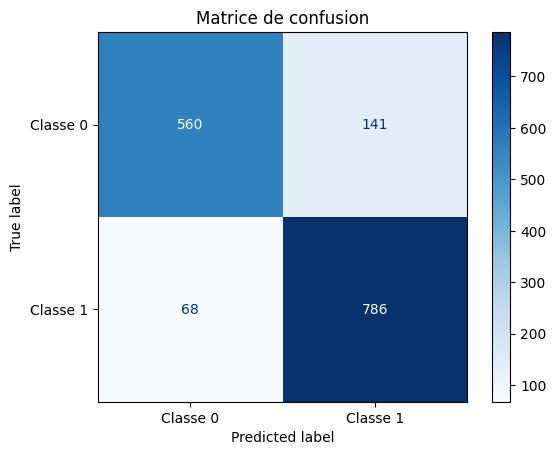

In [23]:
# ======================================================
# Classification binaire avec PerceptronBiais - Version 1
# ======================================================

# Sélection des deux classes à classifier
classe1 = 0
classe2 = 1

# Filtrage des données d'entraînement et de test
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en format binaire (-1/+1)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Préparation des données d'entraînement et de test
X_train_bin = ut.df2array(df_binaire, index_mots)  # Conversion des features
y_train_bin = df_binaire['target_bin'].values      # Labels d'entraînement

X_test_bin = ut.df2array(df_test_bin, index_mots)  # Conversion des features
y_test_bin = df_test_bin['target_bin'].values      # Labels de test

# Initialisation du perceptron AVEC BIAIS
perceptron = classif.ClassifierPerceptronBiais(input_dimension=X_train_bin.shape[1], learning_rate=0.01)

# Listes pour stocker les performances
train_acc = []  # Précision sur le train set
test_acc = []   # Précision sur le test set

# Boucle d'entraînement
N = 100  # Nombre d'itérations

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Étape d'entraînement
    perceptron.train_step(X_train_bin, y_train_bin)
    
    # Prédictions et calcul de l'accuracy
    y_train_pred = np.array([perceptron.predict(x) for x in X_train_bin])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test_bin])
    
    # Enregistrement des performances
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1, N+1), train_acc, label='Train')
plt.plot(range(1, N+1), test_acc, label='Test')  
plt.ylabel('Accuracy')
plt.xlabel("Étape")
plt.title("Évolution de l'accuracy pendant l'entraînement (avec biais)")
plt.legend()
plt.grid(True)
plt.show()

# Affichage des résultats finaux
print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.7105498313903809 secondes


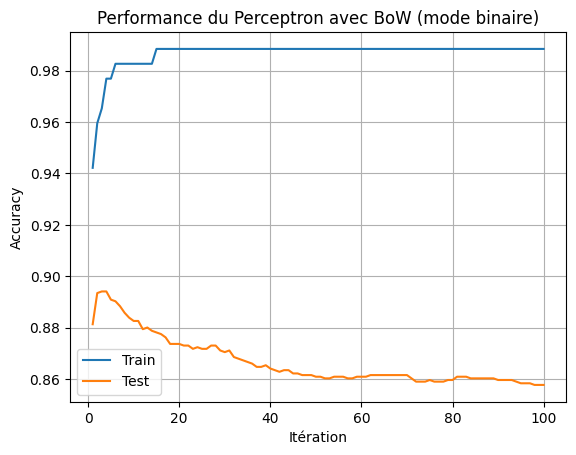

Accuracy finale (train): 0.9884393063583815
Accuracy finale (test) : 0.857780612244898
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0)]
Taux moyen de bonne classification : 0.9882
Écart-type : 0.0144


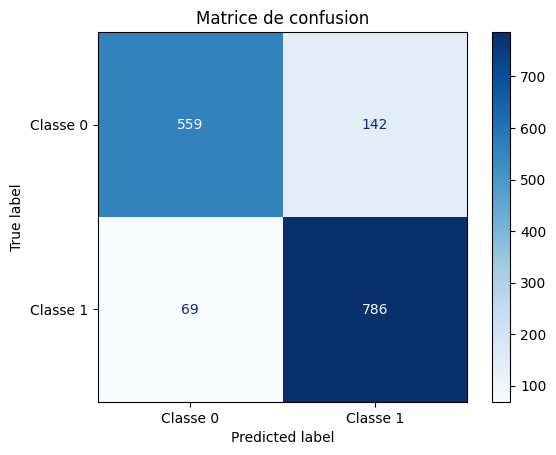

In [24]:
# ======================================================
# Classification binaire avec Bag-of-Words (Binaire) avec PerceptronBiais - Version 2
# ======================================================
# Cette version utilise explicitement un modèle Bag-of-Words (BoW)
# pour la vectorisation des textes

# Sélection des classes (identique à la version 1)
classe1 = 0
classe2 = 1

# Filtrage des données (identique à la version 1)
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels (identique à la version 1)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Initialisation du perceptron
perceptron = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=0.01)

# Entraînement et évaluation
N = 100  # Nombre d'itérations
train_acc, test_acc = [], []  # Stockage des performances

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Étape d'entraînement
    perceptron.train_step(X_train, y_train_bin)
    
    # Prédictions
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    # Calcul et enregistrement des performances
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Performance du Perceptron avec BoW (mode binaire)")
plt.legend()
plt.grid(True)
plt.show()

# Affichage des résultats finaux
print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.717353105545044 secondes


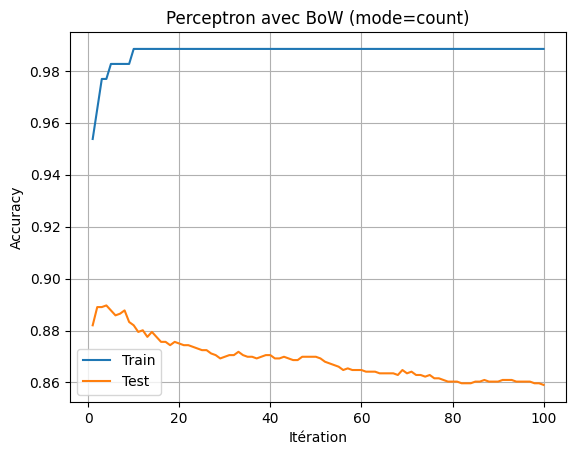

Accuracy finale (train): 0.9884393063583815
Accuracy finale (test) : 0.8590561224489796
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0)]
Taux moyen de bonne classification : 0.9882
Écart-type : 0.0144


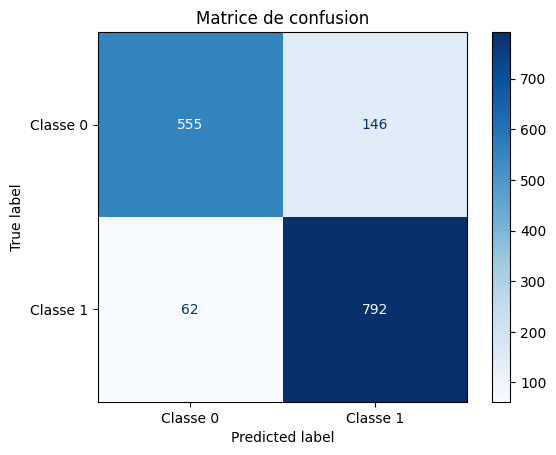

In [25]:
# =================================================================
# Classification binaire avec Comptage de mots (Bag-of-Words count) avec PerceptronBiais - Version 3
# =================================================================
# Cette version utilise la fréquence brute des mots comme caractéristiques

# Définition des classes à classifier
classe1 = 0
classe2 = 1

# Préparation des données - Filtrage des classes sélectionnées
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Transformation des labels en format binaire (-1 pour classe1, +1 pour classe2)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode comptage
# Le mode "count" enregistre le nombre d'occurrences de chaque mot
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Initialisation du perceptron avec le nombre de caractéristiques et taux d'apprentissage
perceptron = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=0.01)

# Boucle d'entraînement et évaluation
N = 100  # Nombre d'itérations
train_acc, test_acc = [], []  # Stockage des précisions

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Phase d'entraînement
    perceptron.train_step(X_train, y_train_bin)
    
    # Prédictions sur les ensembles d'entraînement et de test
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    # Calcul et enregistrement des précisions
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=count)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.854341983795166 secondes


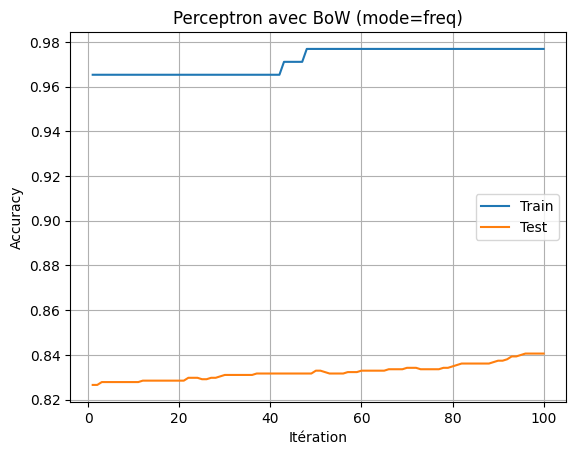

Accuracy finale (train): 0.976878612716763
Accuracy finale (test) : 0.8405612244897959
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9412
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0), np.float64(0.9411764705882353), np.float64(1.0)]
Taux moyen de bonne classification : 0.9824
Écart-type : 0.0235


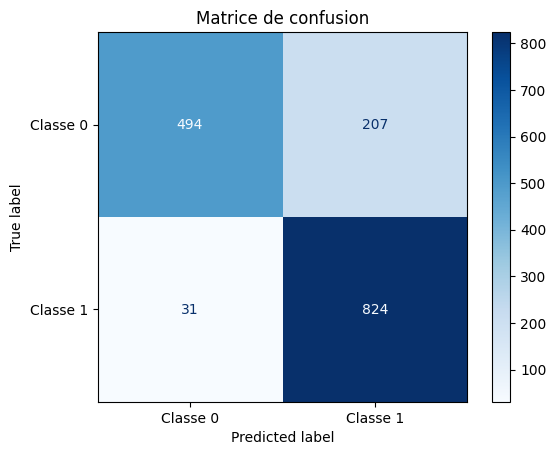

In [26]:
# =================================================================
# Classification binaire avec Fréquence relative (Bag-of-Words freq) avec PerceptronBiais - Version 4
# =================================================================
# Cette version utilise la fréquence relative des mots comme caractéristiques

classe1 = 0
classe2 = 1
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode fréquence
# Le mode "freq" utilise la fréquence relative (occurrences normalisées par document)
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

perceptron = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=0.01)

N = 100
train_acc, test_acc = [], []

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=freq)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 0.8608949184417725 secondes


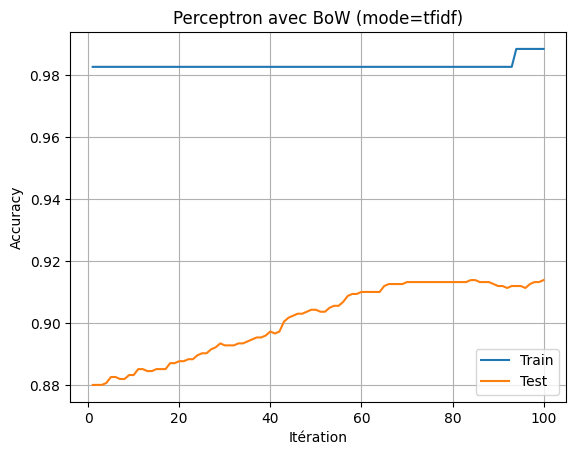

Accuracy finale (train): 0.9884393063583815
Accuracy finale (test) : 0.9139030612244898
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9706
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0), np.float64(0.9705882352941176), np.float64(1.0)]
Taux moyen de bonne classification : 0.9882
Écart-type : 0.0144


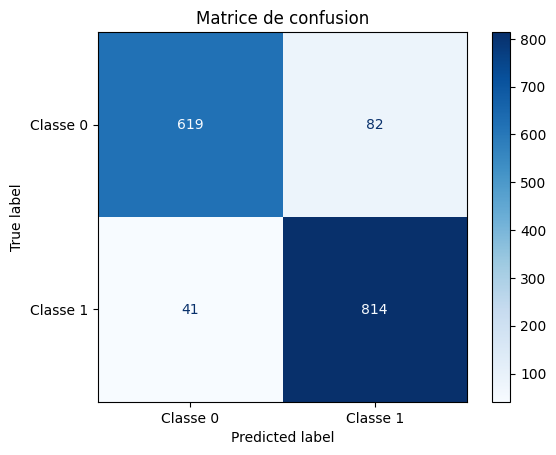

In [27]:
# =================================================================
# Classification binaire avec TF-IDF avec PerceptronBiais - Version 5
# =================================================================
# Cette version utilise le score TF-IDF comme caractéristiques

classe1 = 0
classe2 = 1
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle TF-IDF
# TF-IDF pondère les mots par leur importance dans le document et le corpus
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

perceptron = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=0.01)

N = 100
train_acc, test_acc = [], []

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=tfidf)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps d'entraînement (multi-classe) : 24.49389410018921 secondes
Accuracy entraînement : 0.9875
Accuracy test         : 0.4627


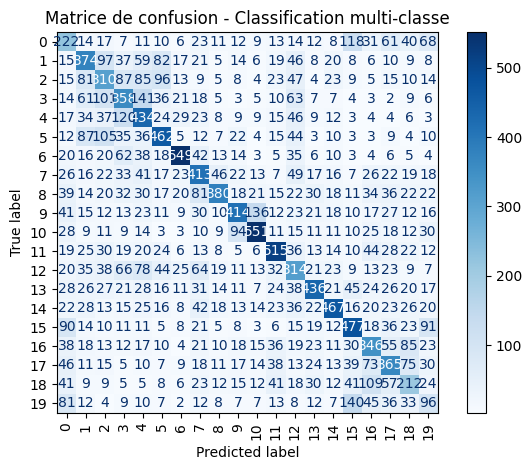

: 

In [28]:
# ---------------------------
# Paramètres du test
# ---------------------------
mode_vectorisation = "binary"   # "binary", "count", "tf", "tfidf"
learning_rate = 0.01
N = 100                         # Nombre d'itérations pour le perceptron
nb_folds = 5

# ---------------------------
# Préparation des données
# ---------------------------

# Extraction des textes tokenisés et des labels
texts_tokenized_train = df_train["les_mots"].tolist()
texts_tokenized_test = df_test["les_mots"].tolist()
y_train_multi = df_train["target"].values
y_test_multi = df_test["target"].values

# Vectorisation
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode=mode_vectorisation)
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode=mode_vectorisation)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# ---------------------------
# Entraînement du modèle Multi-classe (OAA)
# ---------------------------

# Initialisation du classifieur de base (Perceptron)
perceptron_base = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=learning_rate)

# Construction du classifieur multi-classe OAA
oaa_classifier = classif.ClassifierMultiOAA(perceptron_base)

# Chronométrage
start = time.time()
oaa_classifier.train(X_train, y_train_multi)
end = time.time()
print("Temps d'entraînement (multi-classe) :", end - start, "secondes")

# ---------------------------
# Prédictions
# ---------------------------

y_train_pred = np.array([oaa_classifier.predict(x) for x in X_train])
y_test_pred = np.array([oaa_classifier.predict(x) for x in X_test])

# ---------------------------
# Évaluation des performances
# ---------------------------

# Accuracy globale
acc_train = accuracy_score(y_train_multi, y_train_pred)
acc_test = accuracy_score(y_test_multi, y_test_pred)

print(f"Accuracy entraînement : {acc_train:.4f}")
print(f"Accuracy test         : {acc_test:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test_multi, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Matrice de confusion - Classification multi-classe")
plt.grid(False)
plt.tight_layout()
plt.show()

# ---------------------------
# Validation croisée (sur train)
# ---------------------------

# Pour validation croisée, on réinitialise un modèle neuf
def create_new_oaa():
    base = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=learning_rate)
    return classif.ClassifierMultiOAA(base)

perf = []
for i in range(nb_folds):
    Xapp, Yapp, Xtest, Ytest = ev.crossval_strat(X_train, y_train_multi, nb_folds, i)
    clf = create_new_oaa()
    clf.train(Xapp, Yapp)
    Y_pred = np.array([clf.predict(x) for x in Xtest])
    acc = np.mean(Y_pred == Ytest)
    print(f"Itération {i}: Accuracy = {acc:.4f}")
    perf.append(acc)

moyenne = np.mean(perf)
ecart_type = np.std(perf)
print(f"Taux moyen : {moyenne:.4f}, Écart-type : {ecart_type:.4f}")

# Classifier KNN avec distance euclidienne

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 2.83147 secondes
Accuracy (test) : 0.5236
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6765
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6176
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5000
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5), np.float64(0.6764705882352942), np.float64(0.6176470588235294), np.float64(0.5), np.float64(0.5)]
Taux moyen de bonne classification : 0.5588
Écart-type : 0.0744


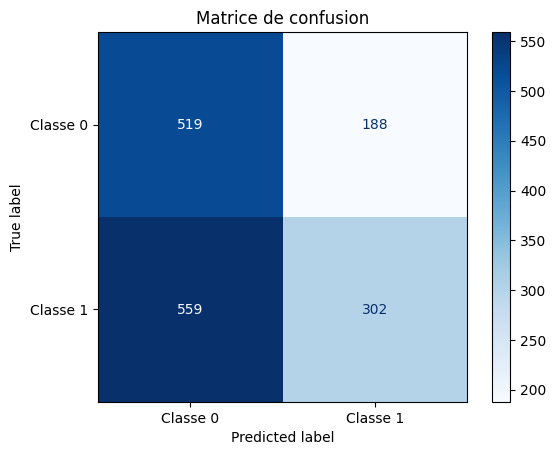

In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words Binaire) avec KNN avec distance euclidienne (k = 3) - Version 1
# =================================================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 2.92091 secondes
Accuracy (test) : 0.6129
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5000
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6471
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7059
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.5000
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.4706
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.5), np.float64(0.6470588235294118), np.float64(0.7058823529411765), np.float64(0.5), np.float64(0.47058823529411764)]
Taux moyen de bonne classification : 0.5647
Écart-type : 0.0937


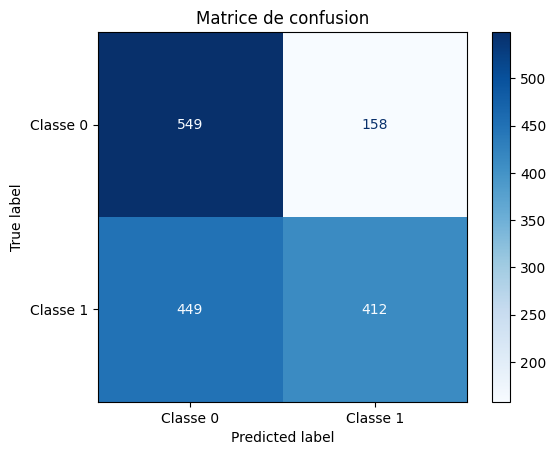

In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words Comptage) avec KNN avec distance euclidienne (k = 3) - Version 2
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 2.79228 secondes
Accuracy (test) : 0.7577
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7353
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6176
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6765
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7059
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.7352941176470589), np.float64(0.6176470588235294), np.float64(0.6764705882352942), np.float64(0.7941176470588235), np.float64(0.7058823529411765)]
Taux moyen de bonne classification : 0.7059
Écart-type : 0.0588


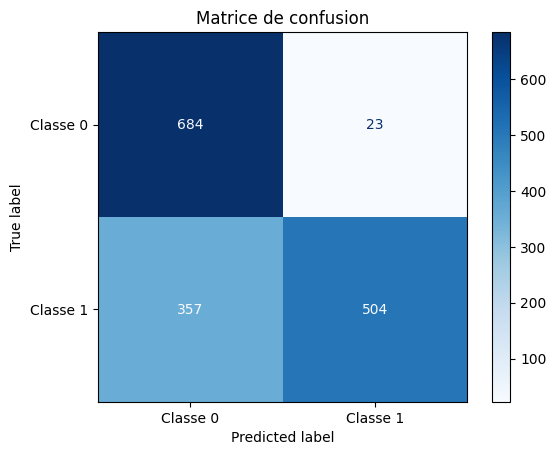

In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words Frequence) avec KNN avec distance euclidienne (k = 3) - Version 3
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 2.73369 secondes
Accuracy (test) : 0.8361
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8235
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.6471
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7353
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.8235294117647058), np.float64(0.6470588235294118), np.float64(0.8823529411764706), np.float64(0.7352941176470589), np.float64(0.8529411764705882)]
Taux moyen de bonne classification : 0.7882
Écart-type : 0.0861


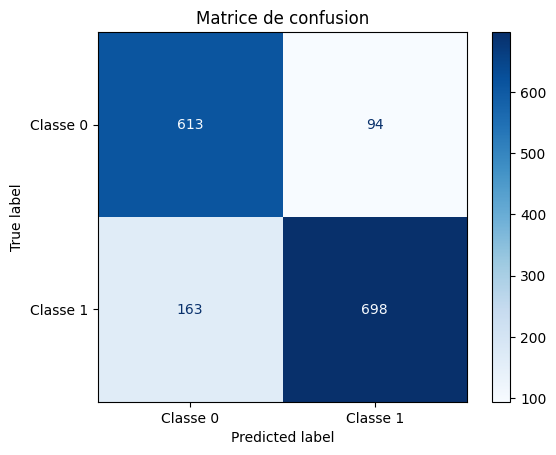

In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words TF-IDF) avec KNN avec distance euclidienne (k = 3) - Version 4
# =================================================================

# Définition des deux classes binaires
classe1 = 0
classe2 = 1

# Filtrage du dataset pour ne garder que les classes d'intérêt
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des cibles en -1 et +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Récupération des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Transformation en représentation TF-IDF manuelle
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

In [ ]:
# =================================================================
# Classification multi-classe avec KNN et distance euclidienne (approche One-vs-All)
# =================================================================
# Cette implémentation utilise la stratégie "Un contre Tous" pour 
# étendre le classifieur KNN binaire à un problème multi-classe

from sklearn.decomposition import PCA

# Définir la dimension cible pour la réduction de dimension, par exemple 50
pca_dim = 50

# Application de la réduction de dimension (PCA) sur l'ensemble d'entraînement (fit + transform)
X_train_multi_full = ut.df2array(df_train, index_mots)
pca = PCA(n_components=pca_dim)
X_train_multi = pca.fit_transform(X_train_multi_full)

# Entraînement de plusieurs classifieurs KNN One-vs-All (Un contre Tous)
classifiers_knn = {}
tic = time.time()
for classe in les_targets:
    y_train_multietiquette = np.where(df_train['target'] == classe, +1, -1)
    clf = classif.ClassifierKNN(input_dimension=pca_dim, k=3)
    clf.train(X_train_multi, y_train_multietiquette)
    classifiers_knn[classe] = clf

toc = time.time()
print(f"Entraînement de plusieurs classifieurs effectuée en {(toc - tic):.5f} secondes")

# Application de la même réduction PCA (apprise sur le train) sur les données de test
X_test_multi_full = ut.df2array(df_test, index_mots)
X_test_multi = pca.transform(X_test_multi_full)
y_true = df_test['target'].values

# Prédiction
y_pred = []
tic = time.time()
for x in X_test_multi:
    scores = {classe: clf.score(x) for classe, clf in classifiers_knn.items()}
    pred = max(scores, key=scores.get)
    y_pred.append(pred)

toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

y_pred = np.array(y_pred)
accuracy_multi = (y_pred == y_true).mean()
print(f"Accuracy (KNN multi-classe avec PCA) : {accuracy_multi:.4f}")

Entraînement de plusieurs classifieurs effectuée en 0.00085 secondes
Prédiction sur test effectuée en 40.53817 secondes
Accuracy (KNN multi-classe avec PCA) : 0.1319


# Classifier KNN avec distance cosinus

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 2.45697 secondes
Accuracy (test) : 0.8323
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9412
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.8823529411764706), np.float64(0.9411764705882353), np.float64(0.8529411764705882), np.float64(0.8529411764705882), np.float64(0.7941176470588235)]
Taux moyen de bonne classification : 0.8647
Écart-type : 0.0478


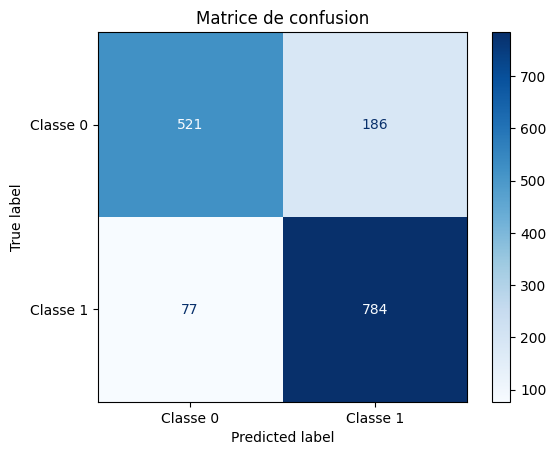

In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words Binaire) avec KNN avec distance cosinus (k = 3) - Version 1
# =================================================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 2.46960 secondes
Accuracy (test) : 0.8629
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.8823529411764706), np.float64(0.8823529411764706), np.float64(0.8529411764705882), np.float64(0.8529411764705882), np.float64(0.7941176470588235)]
Taux moyen de bonne classification : 0.8529
Écart-type : 0.0322


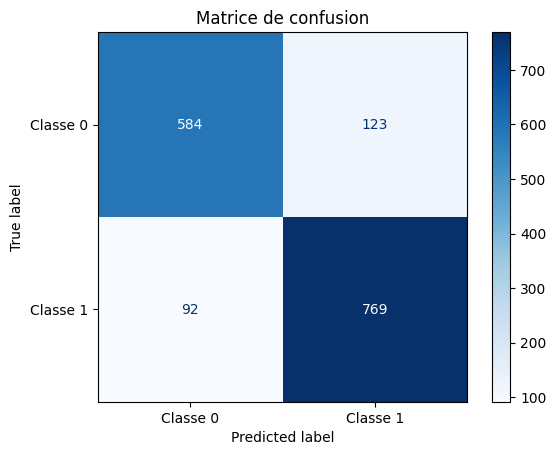

In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words Comptage) avec KNN avec distance cosinus (k = 3) - Version 2
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 2.43910 secondes
Accuracy (test) : 0.8622
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.7941
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.8823529411764706), np.float64(0.8823529411764706), np.float64(0.8529411764705882), np.float64(0.8529411764705882), np.float64(0.7941176470588235)]
Taux moyen de bonne classification : 0.8529
Écart-type : 0.0322


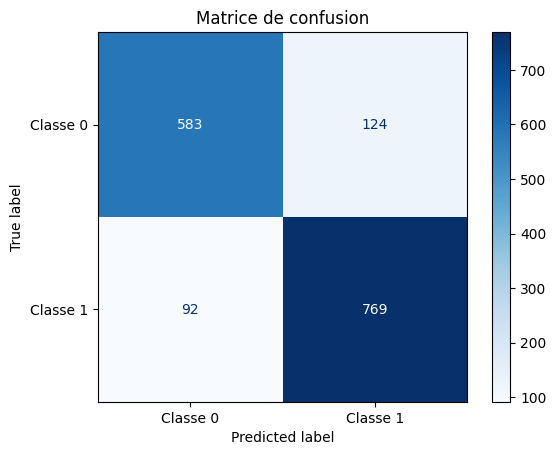

In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words Frequence) avec KNN avec distance cosinus (k = 3) - Version 3
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Apprentissage effectué en 0.00002 secondes
Prédiction sur test effectuée en 2.44209 secondes
Accuracy (test) : 0.8807
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9412
Itération 1: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.9412
Itération 2: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
Itération 3: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8824
Itération 4: taille base app.= 139	taille base test=34	Taux de bonne classif: 0.8529
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.9411764705882353), np.float64(0.9411764705882353), np.float64(0.8529411764705882), np.float64(0.8823529411764706), np.float64(0.8529411764705882)]
Taux moyen de bonne classification : 0.8941
Écart-type : 0.0399


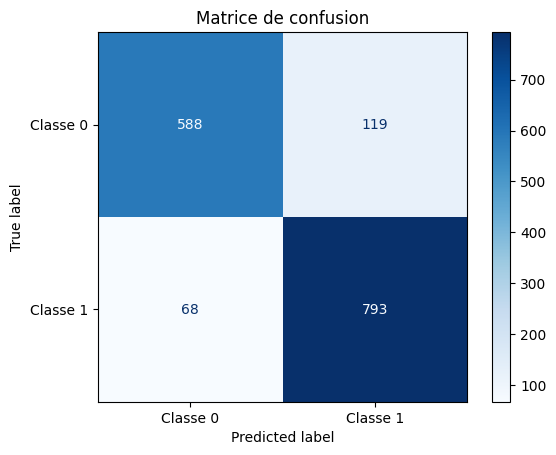

In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words TF-IDF) avec KNN avec distance cosinus (k = 3) - Version 4
# =================================================================

# Définition des deux classes binaires
classe1 = 0
classe2 = 1

# Filtrage du dataset pour ne garder que les classes d'intérêt
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des cibles en -1 et +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Récupération des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Transformation en représentation TF-IDF manuelle
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(knn, (X_train, y_train), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

In [ ]:
# =================================================================
# Classification multi-classe avec KNN et distance cosinus (approche One-vs-All)
# =================================================================
# Cette implémentation utilise la stratégie "Un contre Tous" pour 
# étendre le classifieur KNN binaire à un problème multi-classe

from sklearn.decomposition import PCA

# Définir la dimension cible après réduction par PCA
pca_dim = 50

# Appliquer la réduction de dimension (PCA) sur les caractéristiques du jeu d'entraînement (fit + transform)
X_train_multi_full = ut.df2array(df_train, index_mots)
pca = PCA(n_components=pca_dim)
X_train_multi = pca.fit_transform(X_train_multi_full)

# Entraînement de plusieurs classifieurs KNN (avec distance cosinus) en mode One-vs-All
classifiers_knnCosine = {}
tic = time.time()
for classe in les_targets:
    y_train_multietiquette = np.where(df_train['target'] == classe, +1, -1)
    clf = classif.ClassifierKNNCosine(input_dimension=pca_dim, k=3)
    clf.train(X_train_multi, y_train_multietiquette)
    classifiers_knnCosine[classe] = clf

# Appliquer la même réduction PCA (apprise sur le train) sur les données de test
X_test_multi_full = ut.df2array(df_test, index_mots)
X_test_multi = pca.transform(X_test_multi_full)
y_true = df_test['target'].values

toc = time.time()
print(f"Entraînement de plusieurs classifieurs effectuée en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = []
for x in X_test_multi:
    scores = {classe: clf.score(x) for classe, clf in classifiers_knnCosine.items()}
    pred = max(scores, key=scores.get)
    y_pred.append(pred)

toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

y_pred = np.array(y_pred)
accuracy_multi = (y_pred == y_true).mean()
print(f"Accuracy (KNN multi-classe cosinus avec PCA) : {accuracy_multi:.4f}")

Entraînement de plusieurs classifieurs effectuée en 0.85012 secondes
Prédiction sur test effectuée en 49.68788 secondes
Accuracy (KNN multi-classe cosinus avec PCA) : 0.1615


# Classifier Naive Bayes

In [ ]:
def afficher_frequences_par_classe(df_train, index_mots, les_targets):
    frequences = {l: [0] * len(index_mots) for l in les_targets}
    for l in les_targets:
        exemples_label_l = df_train[df_train['target'] == l]
        for _, row in exemples_label_l.iterrows():
            mots_message = set(row['les_mots'])
            for mot in mots_message:
                if mot in index_mots:
                    index = index_mots.index(mot)
                    frequences[l][index] += 1
        sum_frequencies = len(df_train)
        if sum_frequencies > 0:
            for j in range(len(frequences[l])):
                frequences[l][j] /= sum_frequencies
    return frequences

In [ ]:
frequences = afficher_frequences_par_classe(df_train, index_mots, les_targets)
# Affichage de quelques valeurs de fréquence non nulles 
print("Seuls les 10 premiers non nuls sont affichés.")        
for l in frequences:
    nb = 0
    print("Pour le target",l, ":")
    for j in range(0,len(frequences[l])):
        if frequences[l][j] != 0:
            if (nb < 10):
                print(f'\t {index_mots[j]}:\t {frequences[l][j]:0.6f}')
            nb += 1

Seuls les 10 premiers non nuls sont affichés.
Pour le target 10 :
	 able:	 0.001089
	 absolutely:	 0.001089
	 accomplished:	 0.000545
	 according:	 0.000545
	 across:	 0.000545
	 act:	 0.000545
	 action:	 0.000545
	 acton:	 0.000545
	 actually:	 0.004357
	 add:	 0.000545
Pour le target 3 :
	 ability:	 0.000545
	 able:	 0.005447
	 accelerator:	 0.000545
	 accept:	 0.000545
	 accepted:	 0.000545
	 access:	 0.002179
	 accurate:	 0.000545
	 acquired:	 0.000545
	 across:	 0.000545
	 activate:	 0.000545
Pour le target 17 :
	 abdomen:	 0.000545
	 abide:	 0.000545
	 ability:	 0.001634
	 able:	 0.003268
	 abnormal:	 0.000545
	 abominable:	 0.000545
	 abroad:	 0.000545
	 absolutely:	 0.001634
	 abuse:	 0.000545
	 academic:	 0.000545
Pour le target 4 :
	 able:	 0.001634
	 absolutely:	 0.000545
	 accelerated:	 0.000545
	 accelerator:	 0.002723
	 access:	 0.001634
	 according:	 0.000545
	 across:	 0.000545
	 act:	 0.000545
	 action:	 0.000545
	 activate:	 0.000545
Pour le target 12 :
	 abbreviation

In [ ]:
print("Frequences max:")
for i in les_targets:
    max_freq = max(frequences[i])
    index_max = np.argmax(frequences[i])
    mot_max = index_mots[index_max]
    print(f"\tpour le label {i}: {max_freq:.4f} pour le mot '{mot_max}'")

Frequences max:
	pour le label 10: 0.0180 pour le mot 'game'
	pour le label 3: 0.0147 pour le mot 'drive'
	pour le label 17: 0.0207 pour le mot 'would'
	pour le label 4: 0.0153 pour le mot 'one'
	pour le label 12: 0.0158 pour le mot 'would'
	pour le label 19: 0.0109 pour le mot 'one'
	pour le label 11: 0.0196 pour le mot 'would'
	pour le label 13: 0.0185 pour le mot 'one'
	pour le label 0: 0.0153 pour le mot 'think'
	pour le label 8: 0.0185 pour le mot 'bike'
	pour le label 7: 0.0142 pour le mot 'like'
	pour le label 5: 0.0174 pour le mot 'use'
	pour le label 1: 0.0163 pour le mot 'would'
	pour le label 14: 0.0207 pour le mot 'space'
	pour le label 16: 0.0196 pour le mot 'would'
	pour le label 6: 0.0196 pour le mot 'sale'
	pour le label 9: 0.0136 pour le mot 'good'
	pour le label 18: 0.0191 pour le mot 'people'
	pour le label 2: 0.0142 pour le mot 'know'
	pour le label 15: 0.0272 pour le mot 'one'


In [ ]:
for l in les_targets:
    proba = len(df_train[df_train['target'] == l]) / len(df_train)
    print(f'p({l}) = {proba:0.4f}')

p(10) = 0.0534
p(3) = 0.0528
p(17) = 0.0501
p(4) = 0.0507
p(12) = 0.0523
p(19) = 0.0327
p(11) = 0.0523
p(13) = 0.0523
p(0) = 0.0425
p(8) = 0.0528
p(7) = 0.0512
p(5) = 0.0534
p(1) = 0.0517
p(14) = 0.0523
p(16) = 0.0485
p(6) = 0.0523
p(9) = 0.0523
p(18) = 0.0414
p(2) = 0.0517
p(15) = 0.0534


In [ ]:
# Initialisation du classifieur
nb = classif.ClassifierNaiveBayesMultinomial(input_dimension=len(index_mots), alpha=1.0)

# Entraînement
nb.train(df_train, index_mots)

# Prédiction
y_test = df_test['target'].values
X_test = df_test['les_mots'].tolist()

y_pred = [nb.predict(mots) for mots in X_test]

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (Naive Bayes multinomial): {accuracy:.4f}")


Accuracy (Naive Bayes multinomial): 0.4749


# Classifier Arbre de decision

In [ ]:
import graphviz as gv

# epsilon est le seuil de gain d'information (ex: 0.01) pour éviter le sur-apprentissage
epsilon = 0.01

# Construction et entraînement du modèle
clf_tree = classif.ClassifierArbreDecision(input_dimension=X_train.shape[1], epsilon=epsilon)
clf_tree.train(X_train, y_train)

# Création du graphe de visualisation
graphe_arbre_elections = gv.Digraph(format='png')
clf_tree.draw(graphe_arbre_elections)

# Affichage du graphe obtenu :
graphe_arbre_elections

RecursionError: maximum recursion depth exceeded while calling a Python object

### Apprentissage non-supervisé

*Tâche*: vérifier que le découpage a du sens par rapport aux groupes fournis. 

*Etudes suggérées*:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).
- proposer une visualisation des résultats obtenus


   


# Clustering hiérarchique

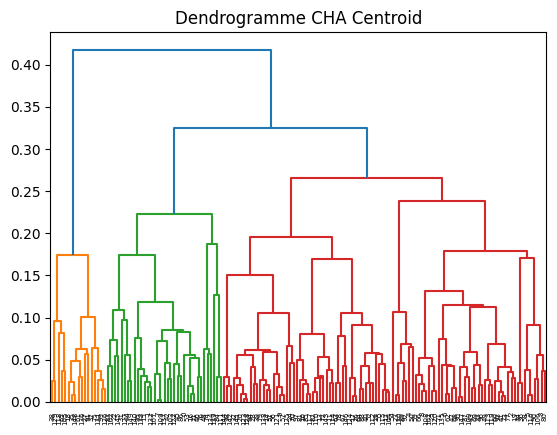

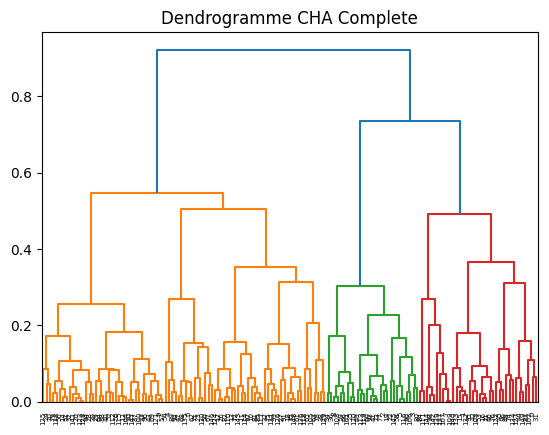

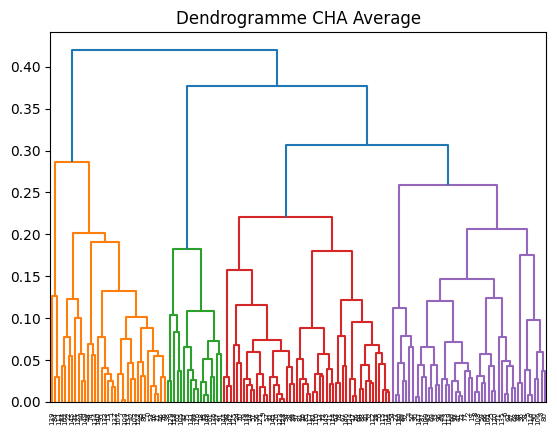

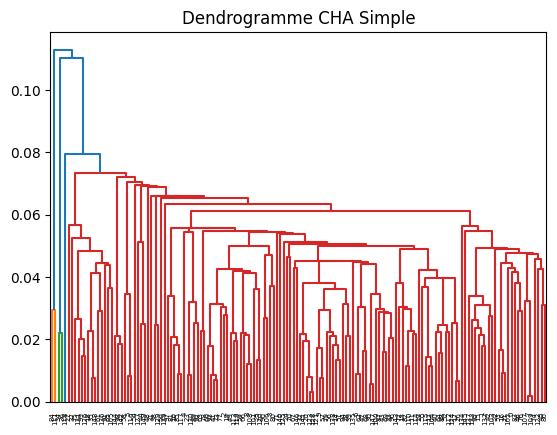

[[7, 109, np.float64(0.001838079192587989), 2],
 [123, 128, np.float64(0.003275999702184011), 2],
 [30, 147, np.float64(0.005543500232864092), 2],
 [17, 26, np.float64(0.006676899634441102), 2],
 [41, 73, np.float64(0.007108542046360769), 2],
 [35, 148, np.float64(0.007502421714318096), 2],
 [9, 57, np.float64(0.00767119391890557), 2],
 [20, 151, np.float64(0.00786485389477728), 3],
 [5, 116, np.float64(0.008308725720486309), 2],
 [93, 154, np.float64(0.008616256405384234), 3],
 [23, 130, np.float64(0.008631863748033618), 2],
 [6, 62, np.float64(0.00893522225772639), 2],
 [85, 117, np.float64(0.00899729908287796), 2],
 [16, 21, np.float64(0.00921318986016284), 2],
 [12, 104, np.float64(0.01132755469206103), 2],
 [82, 110, np.float64(0.01159321494686826), 2],
 [8, 108, np.float64(0.012226672638323824), 2],
 [25, 120, np.float64(0.01334332227696729), 2],
 [14, 51, np.float64(0.013541263526074564), 2],
 [115, 164, np.float64(0.01427327426719478), 3],
 [99, 126, np.float64(0.01482166489860

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_20newsgroups_vectorized
import pandas as pd

# Charger les données (version TF-IDF)
X = fetch_20newsgroups_vectorized().data

# Réduction de dimension à 2 composantes principales pour la visualisation (PCA)
X_pca = PCA(n_components=2).fit_transform(X.toarray())

# Conversion en DataFrame pour compatibilité avec la fonction de clustering
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Sélection des 150 premiers échantillons (comme dans le code original)
X_small = X_pca_df.iloc[:150]

# Application du clustering hiérarchique ascendant (CHA) avec différentes méthodes de linkage
clust.CHA(X_small, linkage='centroid', verbose=False, dendrogramme=True)
clust.CHA(X_small, linkage='complete', verbose=False, dendrogramme=True)
clust.CHA(X_small, linkage='average', verbose=False, dendrogramme=True)
clust.CHA(X_small, linkage='simple', verbose=False, dendrogramme=True)


# k-moyennes

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_20newsgroups_vectorized
import pandas as pd

# Charger les données (version TF-IDF)
X = fetch_20newsgroups_vectorized().data

# Réduction de dimension à 2 dimensions pour la visualisation (PCA)
X_pca = PCA(n_components=2).fit_transform(X.toarray())

# Conversion en DataFrame pour compatibilité avec ta fonction
X_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Sélection des N premiers points (par exemple 1000) pour le clustering
X_small = X_df.iloc[:1000]

In [ ]:
# Définition des paramètres
K = 5            # Nombre de clusters
epsilon = 1e-4   # Seuil de convergence
iter_max = 50    # Nombre maximum d'itérations

# Exécution de l’algorithme k-means
centroids, affectation = clust.kmoyennes(K, X_small, epsilon, iter_max)

Iteration 1 Inertie : 25.9503 Difference: 24.9502
Iteration 2 Inertie : 19.5496 Difference: 6.4007
Iteration 3 Inertie : 17.1743 Difference: 2.3753
Iteration 4 Inertie : 15.7651 Difference: 1.4093
Iteration 5 Inertie : 14.7598 Difference: 1.0053
Iteration 6 Inertie : 14.3455 Difference: 0.4143
Iteration 7 Inertie : 14.1693 Difference: 0.1762
Iteration 8 Inertie : 14.1369 Difference: 0.0324
Iteration 9 Inertie : 14.1252 Difference: 0.0117
Iteration 10 Inertie : 14.1219 Difference: 0.0033
Iteration 11 Inertie : 14.1186 Difference: 0.0033
Iteration 12 Inertie : 14.1152 Difference: 0.0034
Iteration 13 Inertie : 14.1152 Difference: 0.0000


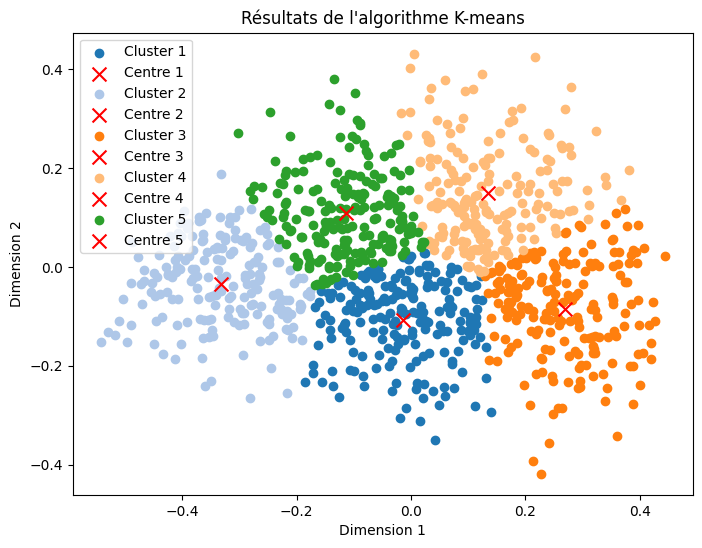

In [ ]:
clust.affiche_resultat(X_small, centroids, affectation)

In [ ]:
# Définition des paramètres
K = 10            # Nombre de clusters
epsilon = 1e-4   # Seuil de convergence
iter_max = 50    # Nombre maximum d'itérations

# Exécution de l’algorithme k-means
centroids, affectation = clust.kmoyennes(K, X_small, epsilon, iter_max)

Iteration 1 Inertie : 11.0990 Difference: 10.0989
Iteration 2 Inertie : 9.3271 Difference: 1.7719
Iteration 3 Inertie : 8.6401 Difference: 0.6870
Iteration 4 Inertie : 8.3443 Difference: 0.2958
Iteration 5 Inertie : 8.1798 Difference: 0.1645
Iteration 6 Inertie : 8.0930 Difference: 0.0869
Iteration 7 Inertie : 8.0196 Difference: 0.0734
Iteration 8 Inertie : 7.9578 Difference: 0.0618
Iteration 9 Inertie : 7.9127 Difference: 0.0450
Iteration 10 Inertie : 7.8662 Difference: 0.0465
Iteration 11 Inertie : 7.8029 Difference: 0.0633
Iteration 12 Inertie : 7.7504 Difference: 0.0525
Iteration 13 Inertie : 7.7070 Difference: 0.0433
Iteration 14 Inertie : 7.6721 Difference: 0.0350
Iteration 15 Inertie : 7.6560 Difference: 0.0161
Iteration 16 Inertie : 7.6315 Difference: 0.0245
Iteration 17 Inertie : 7.6194 Difference: 0.0121
Iteration 18 Inertie : 7.6131 Difference: 0.0063
Iteration 19 Inertie : 7.6108 Difference: 0.0023
Iteration 20 Inertie : 7.6089 Difference: 0.0019
Iteration 21 Inertie : 7.60

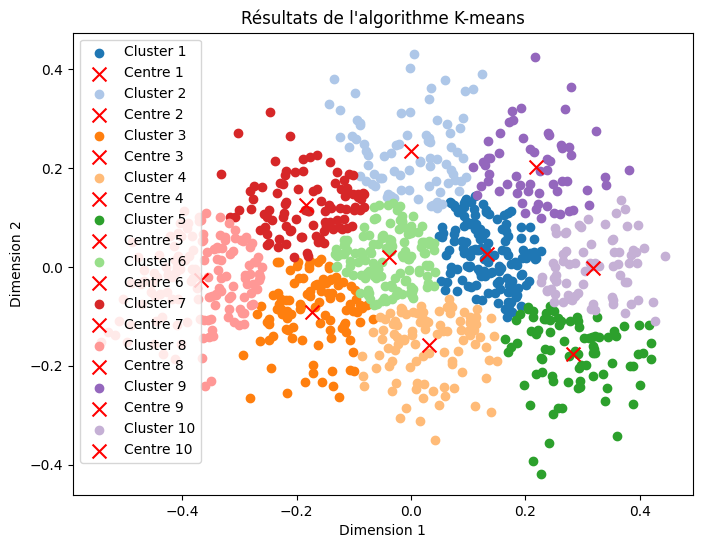

In [ ]:
clust.affiche_resultat(X_small, centroids, affectation)

In [ ]:
# Définition des paramètres
K = 20           # Nombre de clusters
epsilon = 1e-4   # Seuil de convergence
iter_max = 50    # Nombre maximum d'itérations

# Exécution de l’algorithme k-means
centroids, affectation = clust.kmoyennes(K, X_small, epsilon, iter_max)

Iteration 1 Inertie : 6.0857 Difference: 5.0856
Iteration 2 Inertie : 4.8415 Difference: 1.2442
Iteration 3 Inertie : 4.4814 Difference: 0.3601
Iteration 4 Inertie : 4.2861 Difference: 0.1953
Iteration 5 Inertie : 4.1746 Difference: 0.1115
Iteration 6 Inertie : 4.0925 Difference: 0.0821
Iteration 7 Inertie : 4.0444 Difference: 0.0481
Iteration 8 Inertie : 4.0116 Difference: 0.0329
Iteration 9 Inertie : 3.9900 Difference: 0.0216
Iteration 10 Inertie : 3.9793 Difference: 0.0106
Iteration 11 Inertie : 3.9682 Difference: 0.0112
Iteration 12 Inertie : 3.9604 Difference: 0.0078
Iteration 13 Inertie : 3.9535 Difference: 0.0069
Iteration 14 Inertie : 3.9497 Difference: 0.0037
Iteration 15 Inertie : 3.9475 Difference: 0.0022
Iteration 16 Inertie : 3.9464 Difference: 0.0012
Iteration 17 Inertie : 3.9462 Difference: 0.0002
Iteration 18 Inertie : 3.9460 Difference: 0.0002
Iteration 19 Inertie : 3.9460 Difference: 0.0000


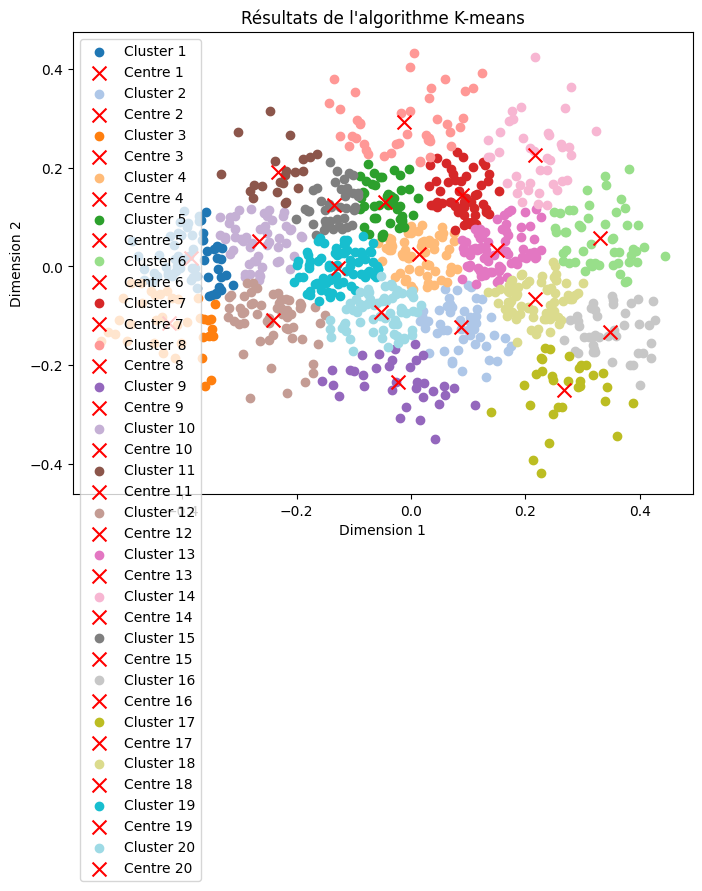

In [ ]:
clust.affiche_resultat(X_small, centroids, affectation)

In [ ]:
from sklearn.metrics import silhouette_score

# Restaurer l'identifiant de cluster pour chaque échantillon sous forme de tableau
labels = np.zeros(len(X_small))
for cluster_id, indices in affectation.items():
    labels[indices] = cluster_id

# Calcul du score de silhouette
score = silhouette_score(X_small.values, labels)
print(f"Score de silhouette : {score:.4f}")

Score de silhouette : 0.3248


In [ ]:
def xie_beni_index_manual(X, labels, centroids):
    n_samples = X.shape[0]
    # Somme des distances intra-cluster au carré
    intra_distances = 0.0
    for i in range(n_samples):
        xi = X[i]
        ci = centroids[labels[i]]
        intra_distances += np.sum((xi - ci) ** 2)

    # Distance minimale inter-cluster (entre centroïdes)
    min_intercluster_dist_sq = float('inf')
    k = len(centroids)
    for i in range(k):
        for j in range(i + 1, k):
            dist_sq = np.sum((centroids[i] - centroids[j]) ** 2)
            if dist_sq < min_intercluster_dist_sq:
                min_intercluster_dist_sq = dist_sq

    # Calcul de l'indice Xie-Beni
    xb = intra_distances / (n_samples * min_intercluster_dist_sq)
    return xb

def euclidean_dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def dunn_index_manual(X, labels):
    unique_labels = np.unique(labels)
    clusters = [X[labels == l] for l in unique_labels]
    
    # 1. Distance minimale entre deux clusters
    min_intercluster = float('inf')
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            for a in clusters[i]:
                for b in clusters[j]:
                    d = euclidean_dist(a, b)
                    if d < min_intercluster:
                        min_intercluster = d
    
    # 2. Distance maximale à l'intérieur d’un cluster
    max_intracluster = 0.0
    for cluster in clusters:
        n = len(cluster)
        for i in range(n):
            for j in range(i + 1, n):
                d = euclidean_dist(cluster[i], cluster[j])
                if d > max_intracluster:
                    max_intracluster = d
    
    # Calcul de l’indice de Dunn
    if max_intracluster == 0:
        return 0
    return min_intercluster / max_intracluster

In [ ]:
X_np = X_small.to_numpy()
labels = labels.astype(int)
xb = xie_beni_index_manual(X_np, labels, centroids)
dunn = dunn_index_manual(X_np, labels)

print(f"Xie-Beni Index (manual): {xb:.4f}")
print(f"Dunn Index (manual): {dunn:.4f}")

Xie-Beni Index (manual): 0.4941
Dunn Index (manual): 0.0193


In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

y_true_small = y_true[:1000]  # Même longueur que labels
labels_small = labels         # labels doit déjà contenir 1000 éléments

# Comparaison
ari = adjusted_rand_score(y_true_small, labels_small)
nmi = normalized_mutual_info_score(y_true_small, labels_small)

print(f"Indice de Rand Ajusté (ARI) : {ari:.4f}")
print(f"Information Mutuelle Normalisée (NMI) : {nmi:.4f}")


Indice de Rand Ajusté (ARI) : 0.0008
Information Mutuelle Normalisée (NMI) : 0.0053


## Poster à rendre dans le compte-rendu (format PDF)

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données, les résultats obtenus en apprentissage supervisé et en apprentissage non-supervisé ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.
